In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vtuIO

In [16]:
analytical_solution = pd.read_csv('analytical.csv')
numerical_solution = vtuIO.PVDIO("results_heatpipe_rough.pvd", dim=2)

results_heatpipe_rough.pvd


In [92]:
time = 1e7
x = np.linspace(0.0,1.0,201)
line=[(i, 0.0025 ,0) for i in x]

T_num = numerical_solution.read_point_set_data(time,'temperature', pointsetarray=line)
pGR_num = numerical_solution.read_point_set_data(time,'gas_pressure', pointsetarray=line)
pCap_num = numerical_solution.read_point_set_data(time,'capillary_pressure', pointsetarray=line)
xnCG_num = numerical_solution.read_point_set_data(time,'xnCG', pointsetarray=line)
sL_num = numerical_solution.read_point_set_data(time,'saturation', pointsetarray=line)

In [82]:
analytical_solution

,z,sL_eff,sL,pGR,xnCG,T,pCap,eta,kRelG,kRelL,pVap,rhoGR
0,0.000000,9.994000e-01,9.994000e-01,101325,2.538300e-01,365.000,5.001000e+03,0.000096,0.000010,0.997803,75617.200,0.694173
1,0.000269,9.894060e-01,9.894060e-01,101342,2.530340e-01,365.034,5.017780e+03,0.001187,0.000010,0.961702,75710.500,0.693933
2,0.000362,9.794120e-01,9.794120e-01,101359,2.528400e-01,365.045,5.034790e+03,0.002079,0.000014,0.926560,75742.800,0.693957
3,0.000490,9.694180e-01,9.694180e-01,101376,2.525280e-01,365.061,5.052030e+03,0.003925,0.000047,0.892362,75787.400,0.693930
4,0.000704,9.594240e-01,9.594240e-01,101394,2.519230e-01,365.088,5.069520e+03,0.005780,0.000110,0.859091,75861.800,0.693778
...,...,...,...,...,...,...,...,...,...,...,...,...
203,1.164790,1.998800e-06,1.998800e-06,104538,-1.705310e-49,374.106,3.969300e+05,0.996874,0.999996,0.000010,104536.000,0.605485
204,1.215760,9.994000e-07,9.994000e-07,104583,4.388350e-49,374.129,5.001000e+05,0.996875,0.999998,0.000010,104559.000,0.605711
205,1.215760,9.994000e-07,9.994000e-07,104583,4.388350e-49,374.129,5.001000e+05,0.996875,0.999998,0.000010,104559.000,0.605711
206,1.344190,8.930540e-17,8.930540e-17,104698,-3.511080e-48,374.188,1.118610e+09,0.997909,1.000000,0.000010,161.565,0.606280


In [83]:
z_a = analytical_solution['z'].to_numpy()
T_a = analytical_solution['T'].to_numpy()
pGR_a = analytical_solution['pGR'].to_numpy()
pCap_a = analytical_solution['pCap'].to_numpy()
xnCG_a = analytical_solution['xnCG'].to_numpy()
sL_a = analytical_solution['sL'].to_numpy()

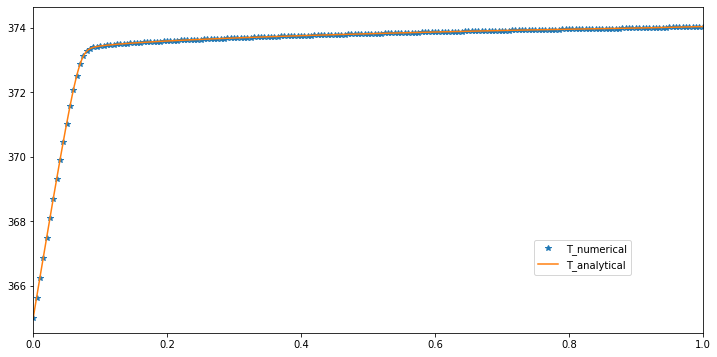

In [111]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, T_num, '*',  label='T_numerical')
ax.plot(x_a, T_a, '-',  label='T_analytical')

plt.xlim([0, 1])
plt.legend(loc='upper right', bbox_to_anchor=(0.9, 0.3))
plt.show()

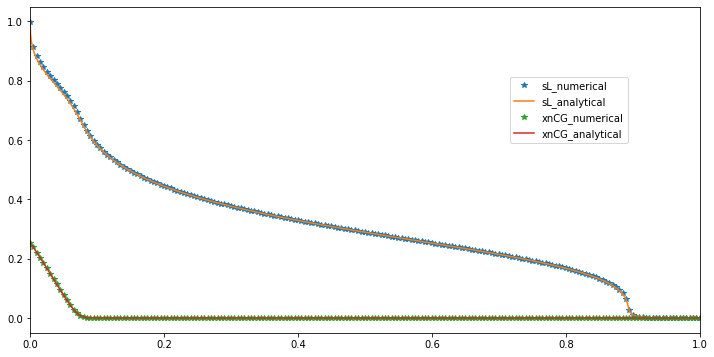

In [115]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, sL_num, '*',  label='sL_numerical')
ax.plot(x_a, sL_a, '-',  label='sL_analytical')

ax.plot(x, xnCG_num, '*',  label='xnCG_numerical')
ax.plot(x_a, xnCG_a, '-',  label='xnCG_analytical')

plt.xlim([0, 1])
plt.legend(loc='upper right', bbox_to_anchor=(0.9, 0.8))
plt.show()

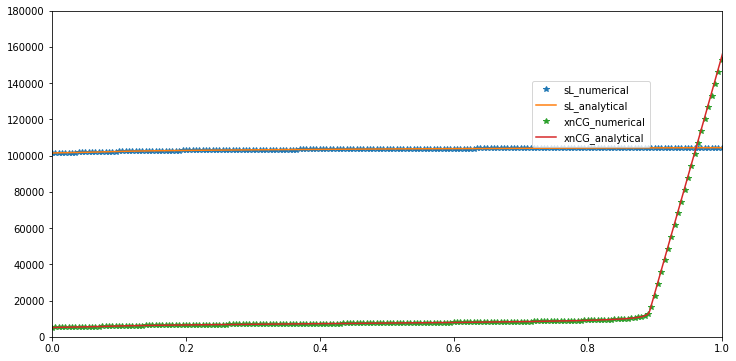

In [126]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, pGR_num, '*',  label='pGR_numerical')
ax.plot(x_a, pGR_a, '-',  label='pGR_analytical')

ax.plot(x, pCap_num, '*',  label='pCap_numerical')
ax.plot(x_a, pCap_a, '-',  label='pCap_analytical')

plt.xlim([0, 1])
plt.ylim([0, 180000])

plt.legend(loc='upper right', bbox_to_anchor=(0.9, 0.8))
plt.show()